In [1]:
import json
import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt

sep = '\n' + '#' * 80 +'\n'

In [2]:
with open('checkin.json', 'r') as f:
    customers = []
    for line in f:
         customers.append(json.loads(line))

In [3]:
for i in range(5):
    pp.pprint(customers[i])
    print("\n\n" + "#" * 80 + "\n\n")

{'business_id': '7KPBkxAOEtb3QeIL9PEErg',
 'time': {'Friday': {'0:00': 2,
                     '10:00': 2,
                     '14:00': 2,
                     '15:00': 1,
                     '16:00': 1,
                     '18:00': 1,
                     '19:00': 2,
                     '21:00': 2,
                     '22:00': 2,
                     '23:00': 1,
                     '3:00': 1},
          'Monday': {'11:00': 1,
                     '12:00': 1,
                     '14:00': 1,
                     '18:00': 1,
                     '19:00': 1,
                     '20:00': 1,
                     '23:00': 1},
          'Saturday': {'0:00': 1,
                       '10:00': 1,
                       '12:00': 1,
                       '13:00': 3,
                       '14:00': 1,
                       '15:00': 1,
                       '16:00': 2,
                       '17:00': 3,
                       '18:00': 4,
                       '1:00': 2,
                

In [4]:
counter = 0
for cust in customers:
    keys = cust.keys()
    if not (len(keys) is 2):
        counter += 1
        
print(counter)

0


In [5]:
counter = 0
for cust in customers:
    keys = cust.keys()
    if not ('time' in keys and 'business_id' in keys):
        counter += 1
        
print(counter)

0


In [6]:
len(customers)

135148


################################################################################

Monday     :   95,080 | 70.35%
Tuesday    :   98,180 | 72.65%
Wednesday  :   99,572 | 73.68%
Thursday   :  100,144 | 74.10%
Friday     :  102,721 | 76.01%
Saturday   :  104,020 | 76.97%
Sunday     :   91,816 | 67.94%

################################################################################



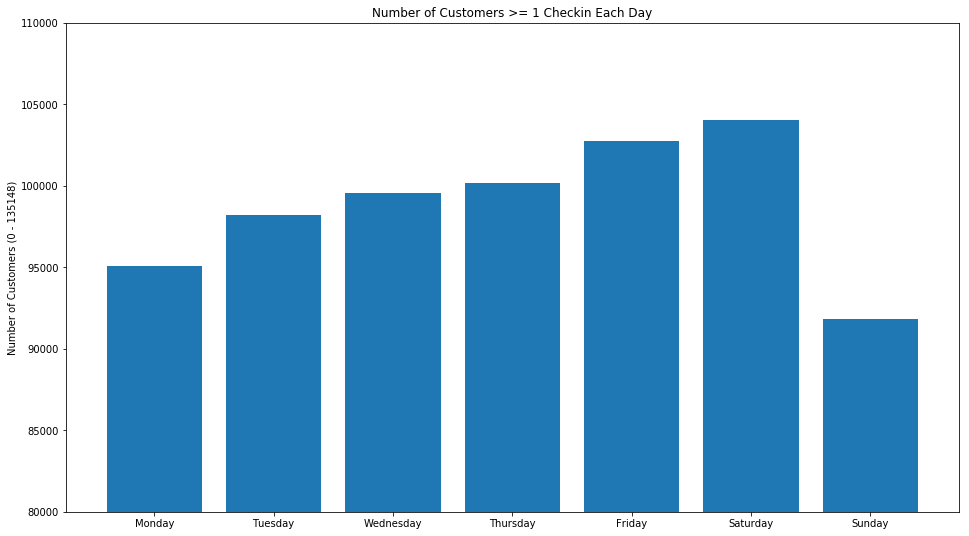

In [7]:
"""Find out how often a day is used by customers,
at least once, ranging from 0 - 135148
"""
days = {'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0,
        'Thursday' : 0, 'Friday' : 0, 'Saturday' : 0,
        'Sunday' : 0}
ds = days.keys()
for cust in customers:
    key = cust['time'].keys()
    for day in ds:
        if day in key:
            days[day] += 1
print(sep)
for dy in ds:
    print('{:11}: {:>8,d} | {:.2f}%'.format(dy, days[dy], (days[dy] / len(customers)) * 100))
print(sep)
plt.figure(1, (16, 9))
plt.title('Number of Customers >= 1 Checkin Each Day')
plt.ylabel('Number of Customers (0 - {})'.format(len(customers)))
plt.bar(range(7), days.values(), tick_label = days.keys())
plt.ylim(80000, 110000)
plt.show()


################################################################################

Total Checkins Each Day
--------------------------

Monday     : 1,889,313
Tuesday    : 1,834,120
Wednesday  : 1,899,031
Thursday   : 1,951,068
Friday     : 2,265,034
Saturday   : 3,122,825
Sunday     : 2,854,842

################################################################################



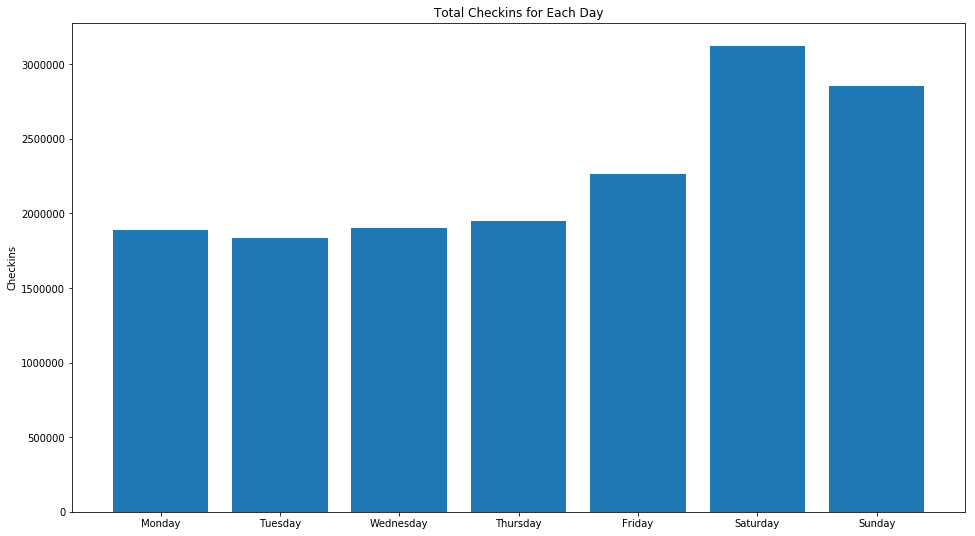

In [8]:
"""Find out how how many checkins total there are by day
"""
days = {'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0,
        'Thursday' : 0, 'Friday' : 0, 'Saturday' : 0,
        'Sunday' : 0}
ds = days.keys()
for cust in customers:
    key = cust['time'].keys()
    for day in ds:
        if day in key:
            days[day] += sum(cust['time'][day].values())
print(sep)
print('Total Checkins Each Day')
print('--------------------------\n')
for dy in ds:
    print('{:11}: {:>,d}'.format(dy, days[dy]))
print(sep)
plt.figure(1, (16, 9))
plt.title('Total Checkins for Each Day')
plt.ylabel('Checkins')
plt.bar(range(7), days.values(), tick_label = days.keys())
plt.show()


################################################################################

Descriptive Statistics of Total Checkins by Business
-------------------------------------------------------

count    135148.000000
mean        117.028983
std         704.498857
min           1.000000
25%           5.000000
50%          18.000000
75%          67.000000
max      126689.000000
dtype: float64

################################################################################

[     0    100    200    300    400    500    600    700    800    900
   1000   1100   1200   1300   1400   1500   1600   1700   1800   1900
   2000   2100   2200   2300   2400   2500   2600   2700   2800   2900
   3000   3100   3200   3300   3400   3500   3600   3700   3800   3900
   4000   4100   4200   4300   4400   4500   4600   4700   4800   4900
   5000  15000  25000  35000  45000  55000  65000  75000  85000  95000
 105000 115000 125000]


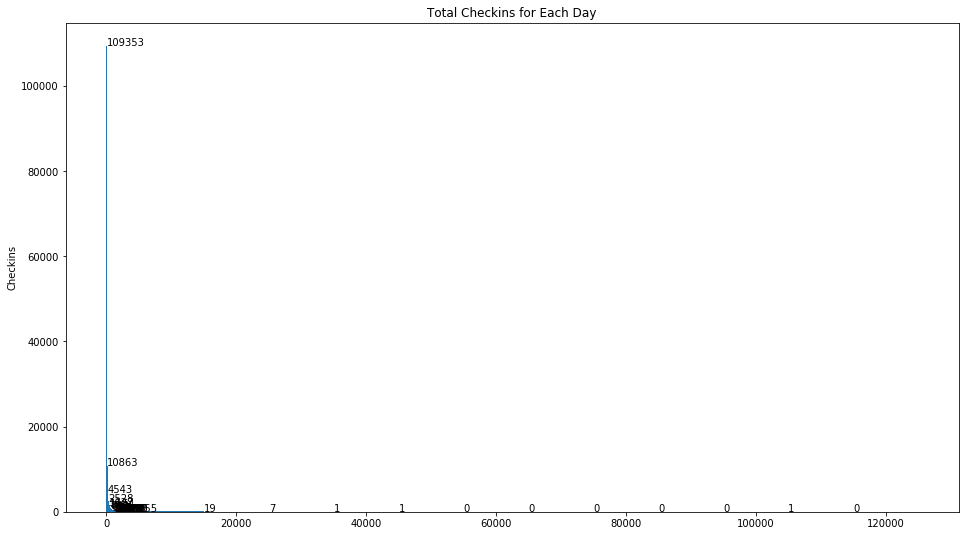

In [29]:
"""Histogram of number of checkins by business
"""
checkins = []
for cust in customers:
    total = 0
    days = cust['time'].keys()
    for day in days:
        total += sum(cust['time'][day].values())
    checkins.append(total)
checkins = pd.Series(checkins)
print(sep)
print('Descriptive Statistics of Total Checkins by Business')
print('-------------------------------------------------------\n')
print(checkins.describe())
print(sep)
plt.figure(1, (16, 9))
plt.title('Total Checkins for Each Day')
plt.ylabel('Checkins')
h = plt.hist(checkins, bins = list(range(0, 5000, 100)) + list(range(5000, 130000, 10000)))
for i in range(len(h[0])):
    plt.text(h[1][i], h[0][i], str(int(h[0][i])))
print(h[1])    
plt.show()